В этой части проекта вам нужно написать несколько SQL-запросов в Jupyter Notebook. Эти задания проверят вручную, и вы получите комментарии к составленным запросам. 

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. Вспомните инструкцию из урока 11 «Когортный анализ. Представление результатов» в теме 2 «Установка и настройка базы данных и клиента базы данных».. Пример кода для подключения к базе и выгрузки результатов вы найдёте и в этой тетрадке. 

Некоторые задания включают дополнительные вопросы — не пропустите их. На часть вопросов можно ответить текстом, а для некоторых понадобится визуализация. Помните, что результат запроса можно выгрузить в датафрейм. 

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text

Константы

In [2]:
users = 'stackoverflow.users'
posts = 'stackoverflow.posts'
post_types = 'stackoverflow.post_types'
badges = 'stackoverflow.badges'
votes = 'stackoverflow.votes'
vote_types = 'stackoverflow.vote_types'

Настройки

In [3]:
# Seaborn

PLOT_DPI = 150  # dpi for charts rendering 
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plt.rc(
       'axes',
       labelweight='bold',
       titlesize=16,
       titlepad=10,
      )

In [4]:
# Pandas defaults

pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format # изменено с '{:.3f}' на '{:.2f}'
pd.options.display.colheader_justify = 'left'

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [5]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [6]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [7]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [8]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


Функция

In [9]:
def sql_query(query_text):
    
    engine = create_engine(connection_string)           # создание подключения
    
    with engine.begin() as conn:
        return pd.read_sql_query(text(query), conn)

# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [10]:
query = f'''

        SELECT
            DATE_TRUNC('month', creation_date) AS month_date,
            SUM(views_count) AS total_views
        
        FROM
            {posts}
        
        GROUP BY
            DATE_TRUNC('month', creation_date)
        
        ORDER BY
            total_views DESC

        '''

df = sql_query(query)
df


,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

In [11]:
# напишите ваш ответ здесь

Мы видим, что самое большое количество просмотров в 2008 г наблюдается в осенний период. Дальше по-убыванию зима и лето.
Вероятнее всего всплеск активности просмотров в осенний период связан с началом учебного сезона. Соответственно, ближе к летним каникулам интерес к учёбе постепено сходит на нет.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [12]:
# напишите запрос
query = f'''

        SELECT DISTINCT
            {users}.display_name,
            COUNT(DISTINCT {users}.id)
        FROM
            {users}
            JOIN {posts} ON {posts}.user_id = {users}.id
            JOIN {post_types} ON {post_types}.id = {posts}.post_type_id
        
        WHERE
           {post_types}.type LIKE '%Answer%'
           AND
           {posts}.creation_date::date BETWEEN {users}.creation_date::date AND
                                               {users}.creation_date::date + INTERVAL '1 month'
        GROUP BY
            {users}.display_name
           
        HAVING
            COUNT({posts}.id) > 100
            
        ORDER BY
            {users}.display_name
           
        '''

sql_query(query)

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
5,Amy B,1
6,Ben Hoffstein,1
7,Brian,15
8,Cade Roux,1
9,CesarB,1


Какие аномалии наблюдаются в данных? О чём они говорят?

In [13]:
# напишите ваш ответ здесь

Аномалия в данных заключается в том что у каждого пользоваетеля несколько user_id. Должно быть: один пользователь = один user_id

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [14]:
# напишите запрос
query = f'''

        WITH 
        
        users_id AS
        (
        SELECT
            {users}.id AS user_id
            
        FROM
            {users}
            JOIN {posts} ON {posts}.user_id = {users}.id
            
        WHERE
            DATE_TRUNC('month', {users}.creation_date) = '2008-09-01'
            AND
            DATE_TRUNC('month', {posts}.creation_date) = '2008-12-01'
        )


        SELECT
            DATE_TRUNC('month', {posts}.creation_date) AS month,
            COUNT({posts}.id)
            
        FROM
            {posts}
            
        WHERE
            {posts}.user_id IN (SELECT user_id FROM users_id)
            
        GROUP BY
            DATE_TRUNC('month', {posts}.creation_date)
            
        ORDER BY
            month DESC

        '''

sql_query(query)

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

In [15]:
# напишите ваш ответ здесь

Просмотры в авшусте можно охарактеризовать как аномальное значение, тк выбока для тех кто зарегистрировался в сентябре.
Возможное объяснение: некорректная запись даты регистрации или некорректная запись даты поста по техническим причинам.

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [16]:
# напишите запрос
query = f'''

        SELECT
            user_id,
            creation_date,
            views_count,
            SUM(views_count) OVER(PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
            
        FROM
            {posts}
           
        ORDER BY
            user_id,
            creation_date
            
        '''

sql_query(query)



,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [17]:
# напишите запрос
query = f'''

        WITH 
        
        post_count AS
        (
        SELECT
            user_id,
            creation_date::DATE,
            COUNT(id) AS post_count

        FROM
            {posts}

        WHERE
            DATE_TRUNC('month', creation_date)::DATE = '2008-08-01'

        GROUP BY
            user_id,
            creation_date::DATE
        )
        
        
        SELECT
            user_id,
            AVG(post_count) AS avg_daily
            
        FROM
            post_count
            
        GROUP BY
            user_id
            
        HAVING
            SUM(post_count) > 120
            
        ORDER BY
            avg_daily
           
        '''

sql_query(query)

,user_id,avg_daily
0,116,4.78
1,234,5.21
2,91,5.68
3,905,7.00
4,383,7.28


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [18]:
# напишите запрос
query = f'''

        WITH
        
        activity AS
        (
        SELECT
            user_id,
            COUNT(DISTINCT creation_date::DATE) AS days_active

        FROM
            {posts}

        WHERE
            creation_date::DATE BETWEEN '2008-12-01' AND '2008-12-07'

        GROUP BY
            user_id
        )
        
        
        SELECT
            CAST(AVG(days_active) AS INTEGER) AS result
            
        FROM
            activity
        
        '''

sql_query(query)

,result
0,2


Проанализируйте итоговую таблицу — какие выводы можно сделать?

In [19]:
# напишите ваш ответ здесь

Взаимодействие с платформой было малоинтенсивным, два дня за неделю

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [20]:
# напишите запрос
query = f'''

        SELECT
            user_id,
            creation_date,
            LAG(TO_CHAR(creation_date, 'Month'), 2) OVER(PARTITION BY user_id ORDER BY creation_date)
            
        FROM
            {posts}
            
        ORDER BY
            user_id,
            creation_date
        
        '''

sql_query(query)

,user_id,creation_date,lag
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [21]:
# напишите запрос

query = f'''
        
        WITH
        
        cohort_init AS
        (
        SELECT DISTINCT                              /* месяц первого поста пользователя определяет его когорту */
            user_id,
            FIRST_VALUE(DATE_TRUNC('month', creation_date)) OVER(PARTITION BY user_id ORDER BY creation_date)
                                                                                                    AS cohort_date
        FROM
            {posts}
        ),
        
        
        cohort_info AS
        (
        SELECT                                       /* количество пользователей в когорте */
            *,
            COUNT(user_id) OVER(PARTITION BY cohort_date) AS cohort_users_cnt
        FROM
            cohort_init
        
        ORDER BY
            cohort_date,
            user_id
        ),
        
        
        acivity AS
        (
        SELECT                                       /* наличие активности пользователя в определенный месяц */
            user_id,
            DATE_TRUNC('month', creation_date) AS session_date
            
        FROM
            {posts}
            
        GROUP BY
            user_id,
            DATE_TRUNC('month', creation_date)
        )
        
        
        SELECT
            cohort_date,
            session_date,
            COUNT(cohort_info.user_id),
            cohort_users_cnt,
            COUNT(cohort_info.user_id)::numeric / cohort_users_cnt AS retention_rate
            
        FROM
            cohort_info
            JOIN acivity ON acivity.user_id = cohort_info.user_id
            
        GROUP BY
            cohort_date,
            session_date,
            cohort_users_cnt
        
        '''

df = sql_query(query)
df


,cohort_date,session_date,count,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,1.00
1,2008-07-01,2008-08-01,2,3,0.67
2,2008-07-01,2008-09-01,1,3,0.33
3,2008-07-01,2008-10-01,2,3,0.67
4,2008-07-01,2008-11-01,1,3,0.33
5,2008-07-01,2008-12-01,2,3,0.67
6,2008-08-01,2008-08-01,2151,2151,1.00
7,2008-08-01,2008-09-01,1571,2151,0.73
8,2008-08-01,2008-10-01,1275,2151,0.59
9,2008-08-01,2008-11-01,1050,2151,0.49


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

In [22]:
# постройте тепловую карту Retention Rate

df.cohort_date = df.cohort_date.dt.strftime('%Y-%m')
df.session_date = df.session_date.dt.strftime('%Y-%m')

retention = df.pivot('cohort_date', 'session_date', 'retention_rate')

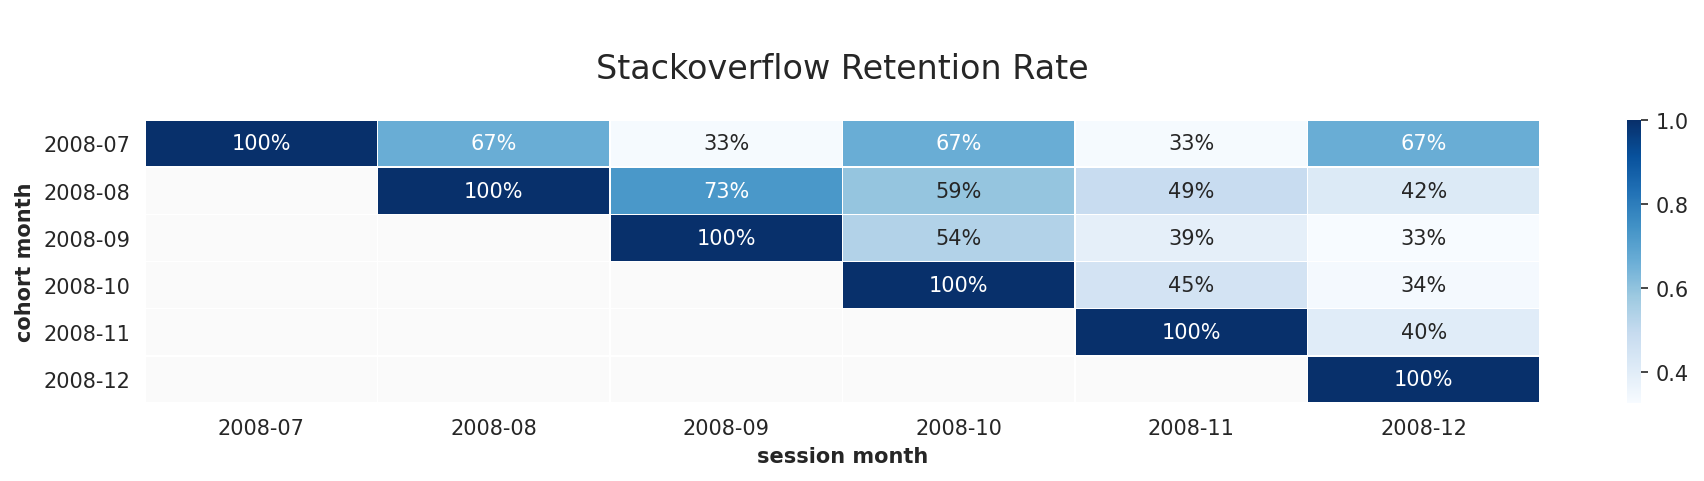

In [23]:
fig, ax = plt.subplots(figsize=(15, 0.5*df.shape[1]), dpi=PLOT_DPI)

sns.heatmap(
            retention,
            annot=True,
            annot_kws={'fontsize':10}, 
            fmt='0.0%',
            linewidths=0.2,
            cmap='Blues'
           )

plt.title('\nStackoverflow Retention Rate', pad=20)
ax.set_xlabel('session month')
ax.set_ylabel('cohort month')

plt.show() 

In [24]:
# опишите аномалии или другие необычные явления и сформулируйте гипотезы

Чем позднее дата когорты тем быстрее падает Retention Rate. В первой когорте цыфры Retention Rate непостоянны,
Возможно из-за нерепрезентативной выборки (мало человек).

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [25]:
# напишите запрос
query = f'''

        WITH
        
        post_monthly AS
        (
        SELECT
            EXTRACT(MONTH FROM creation_date)::integer AS creation_month,
            COUNT(id) AS post_count
            
        FROM
            {posts}
            
        WHERE
            creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
            
        GROUP BY
            EXTRACT(MONTH FROM creation_date)
        )
        
        
        SELECT
            *,
            ROUND((post_count::numeric / LAG(post_count) OVER(ORDER BY creation_month) - 1) * 100, 2) AS percentage
            
        FROM
            post_monthly
        
        '''

df = sql_query(query)
df

,creation_month,post_count,percentage
0,9,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

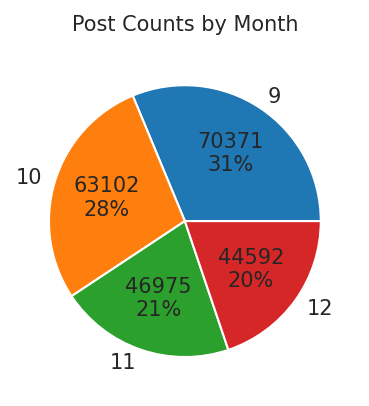

In [26]:
# постройте круговую диаграмму с количеством постов по месяцам

fig, ax = plt.subplots(figsize=(3,3), dpi=PLOT_DPI)

plt.pie(df.post_count, labels=df.creation_month, autopct=lambda p: f'{p*sum(df.post_count)/100 :.0f}\n{p :.0f}%')
plt.title('Post Counts by Month', fontsize=10)

plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [27]:
# напишите запрос
query = f'''

        WITH
        
        post_count AS                                  /* количество постов у каждого пользователя */
        (
        SELECT
            user_id,
            COUNT(id) AS post_cnt
        FROM
            {posts}
        GROUP BY
            user_id
        ),
        
        post_max_count AS                              /* максимальное количество постов у одного пользователя */
        (
        SELECT
            MAX(post_cnt) AS post_cnt
        FROM
            post_count
        ),
        
        post_max_user_id AS                            /* пользователь(ли) с максимальным количеством постов */
        (
        SELECT
            user_id
        FROM
            post_count
        WHERE
            post_cnt = (SELECT post_cnt FROM post_max_count)
        )


        SELECT DISTINCT
            EXTRACT(WEEK FROM creation_date)::integer AS week_creation,
            MAX(creation_date) OVER(PARTITION BY EXTRACT(WEEK FROM creation_date))
        FROM
            {posts}
        WHERE
            user_id = (SELECT user_id FROM post_max_user_id)
            AND
            DATE_TRUNC('month', creation_date) = '2008-10-01'
        
        '''

sql_query(query)

,week_creation,max
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01
